In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time

In [10]:
from rms import Planet, Star, Spot, STSP

k62f = Planet(per=267.291, inc=89.9, a=241.09992254527495, 
              t0=2455422.71, rp=0.020231403622250968, ecc=0, w=90, lam=0)
k62e = Planet(per=122.3874, inc=89.98, a=143.22933849550512, 
              t0=2454983.404, rp=0.02312160413971539, ecc=0, w=90, lam=0)

In [7]:
k62 = Star(k62f, rotation_period=39.3, inc_stellar=90)


Spots tossed:

<Spot: lat=-19.05350572641453 deg, lon=1.0558255172129454 rad, rad=0.0061745250737885735> [rms.stsp]


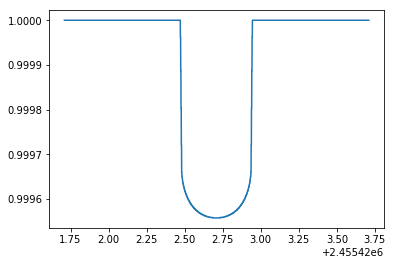

In [19]:
times = Time(np.arange(k62f.t0 - 1, k62f.t0 + 1, 10/60/60/24), format='jd')

lcs = []

for i in range(100):
    spots = [Spot.from_sunspot_distribution() for _ in range(20)]
    with STSP(times, k62, spots) as stsp: 
        lc = stsp.generate_lightcurve(normalize_oot=True)
    lcs.append(lc)

plt.plot(lc.times.jd, lc.fluxes)

In [33]:
median_lc

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

Text(0.5,1,'Kepler-62 f: max(transit residual)/depth = 0.0014')

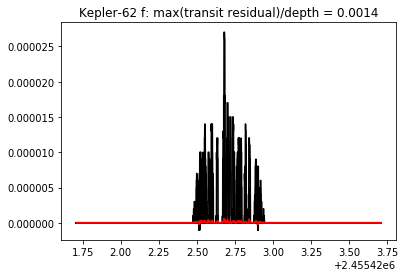

In [38]:
median_lc = np.nanmedian([lc.fluxes for lc in lcs if len(lc.fluxes) > 8000], axis=0)

mean = np.nanmean([lc.fluxes for lc in lcs if len(lc.fluxes) > 8000], axis=0)

for lc in lcs: 
    if len(lc.fluxes) > 8000:
        plt.plot(lc.times.jd, lc.fluxes - median_lc, color='k')

plt.plot(lc.times.jd, mean - median_lc, color='r', lw=2)
plt.title('Kepler-62 f: max(transit residual)/depth = {0:.4f}'.format(max(mean - median_lc)/k62f.rp**2))


Spots tossed:

<Spot: lat=-9.20196486225448 deg, lon=1.770243410894814 rad, rad=0.006882435633548632> [rms.stsp]

Spots tossed:

<Spot: lat=8.463023947219982 deg, lon=0.8014822475429145 rad, rad=0.00751323765195228> [rms.stsp]


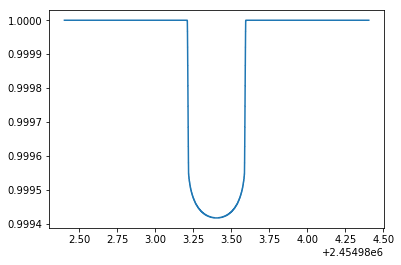

In [41]:
k62 = Star(k62e, rotation_period=39.3, inc_stellar=90)
times = Time(np.arange(k62e.t0 - 1, k62e.t0 + 1, 10/60/60/24), format='jd')

lcs = []

for i in range(100):
    spots = [Spot.from_sunspot_distribution() for _ in range(20)]
    with STSP(times, k62, spots) as stsp: 
        lc = stsp.generate_lightcurve(normalize_oot=True)
    lcs.append(lc)

plt.plot(lc.times.jd, lc.fluxes)

Text(0.5,1,'Kepler-62 e: max(transit residual)/depth = 0.0008')

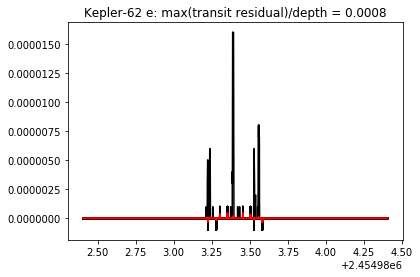

In [42]:
median_lc = np.nanmedian([lc.fluxes for lc in lcs if len(lc.fluxes) > 8000], axis=0)

mean = np.nanmean([lc.fluxes for lc in lcs if len(lc.fluxes) > 8000], axis=0)

for lc in lcs: 
    if len(lc.fluxes) > 8000:
        plt.plot(lc.times.jd, lc.fluxes - median_lc, color='k')

plt.plot(lc.times.jd, mean - median_lc, color='r', lw=2)
plt.title('Kepler-62 e: max(transit residual)/depth = {0:.4f}'.format(max(mean - median_lc)/k62e.rp**2))